In [1]:
#Libraries needed to implement and simulate quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
#Custem functions to simplify answers
import Our_Qiskit_Functions as oq #a part of the library presented in arXiv:1903.04359v1.

import numpy as np
import math as m

#Initialize backends simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

In [2]:
q = QuantumRegister(2, name='q')
test_g = QuantumCircuit(q, name = 'qc')

test_g.h(q[0])
test_g.x(q[1])
test_g.cz(q[0],q[1])
test_g.x(q[1])

print('_________Initial state____________')
oq.Wavefunction(test_g)

f=oq.Blackbox_g_D(test_g, q)

print('\n_____________After blackbox___________')
oq.Wavefunction(test_g);

_________Initial state____________
0.70711  |00>   -0.70711  |10>   

_____________After blackbox___________
0.70711  |00>   -0.70711  |10>   


In [3]:
q = QuantumRegister(2, name='q')
deutsch_qc = QuantumCircuit(q, name = 'qc')

deutsch_qc.h(q[0])
deutsch_qc.x(q[1])
deutsch_qc.h(q[1])

print('_________Initial state____________')
oq.Wavefunction(deutsch_qc)

deutsch_qc.draw()

_________Initial state____________
0.5  |00>   0.5  |10>   -0.5  |01>   -0.5  |11>   


┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

In [4]:
q = QuantumRegister(2, name='q')
deutsch_qc = QuantumCircuit(q, name = 'qc')

deutsch_qc.h(q[0])
deutsch_qc.x(q[1])
deutsch_qc.h(q[1])

print('_________Initial state____________')
oq.Wavefunction(deutsch_qc)

f=oq.Blackbox_g_D(deutsch_qc, q)

print('\n_____________After blackbox___________')
oq.Wavefunction(deutsch_qc)

deutsch_qc.h(q[0])
deutsch_qc.h(q[1])

print('\n_____________After H^2___________')
oq.Wavefunction(deutsch_qc);


_________Initial state____________
0.5  |00>   0.5  |10>   -0.5  |01>   -0.5  |11>   

_____________After blackbox___________
0.5  |00>   -0.5  |10>   -0.5  |01>   0.5  |11>   

_____________After H^2___________
1.0  |11>   


In [5]:
q = QuantumRegister(2, name='q')
deutsch_qc = QuantumCircuit(q, name = 'qc')

deutsch_qc.x(q[1])

deutsch_qc.h(q[0])
deutsch_qc.h(q[1])

print('_________Initial state____________')
oq.Wavefunction(deutsch_qc)

f=oq.Blackbox_g_D(deutsch_qc, q)

print('\n_____________After blackbox___________')
oq.Wavefunction(deutsch_qc)

deutsch_qc.h(q[0])
#deutsch_qc.h(q[1])

print('\n_____________After H^2___________')
oq.Wavefunction(deutsch_qc);

_________Initial state____________
0.5  |00>   0.5  |10>   -0.5  |01>   -0.5  |11>   

_____________After blackbox___________
-0.5  |00>   -0.5  |10>   0.5  |01>   0.5  |11>   

_____________After H^2___________
-0.70711  |00>   0.70711  |01>   


In [6]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
deutsch_qc = QuantumCircuit(q, c, name = 'qc')

deutsch_qc.x(q[1])

f = oq.Deutsch(deutsch_qc, q)
deutsch_qc.measure(q,c)

Qubit0_M = list(oq.execute(deutsch_qc, M_simulator, shots = 1).result().get_counts(deutsch_qc).keys())[0][1]

if Qubit0_M == '0':
    print('Measured state |0> therefore f is constant!')
else:
    print('Measured state |1> therefore f is balanced!')
    
print(' ')
print('Hidden f: ',f)

Measured state |0> therefore f is constant!
 
Hidden f:  f(0,1) -> 1


_________Initial state____________
0.5  |00>   0.5  |10>   -0.5  |01>   -0.5  |11>   
_________X____________
0.5  |00>   0.5  |10>   -0.5  |01>   -0.5  |11>   
_________CNOT____________
0.5  |00>   -0.5  |10>   -0.5  |01>   0.5  |11>   
_________X____________
-0.5  |00>   0.5  |10>   0.5  |01>   -0.5  |11>   


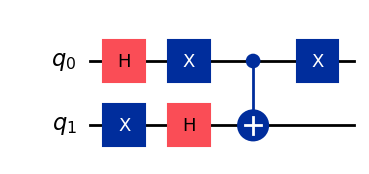

In [7]:
q = QuantumRegister(2, name='q')
zero_CNOT = QuantumCircuit(q, name = 'qc')

zero_CNOT.x(q[1])

zero_CNOT.h(q[0])
zero_CNOT.h(q[1])

print('_________Initial state____________')
oq.Wavefunction(zero_CNOT)

zero_CNOT.x(q[0])
print('_________X____________')
oq.Wavefunction(zero_CNOT)

zero_CNOT.cx(q[0],q[1])
print('_________CNOT____________')
oq.Wavefunction(zero_CNOT)

zero_CNOT.x(q[0])
print('_________X____________')
oq.Wavefunction(zero_CNOT)

zero_CNOT.draw(output='mpl')